<a href="https://colab.research.google.com/github/aman18110014/ML_Assignment3/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_digits
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn import metrics
digits = load_digits()

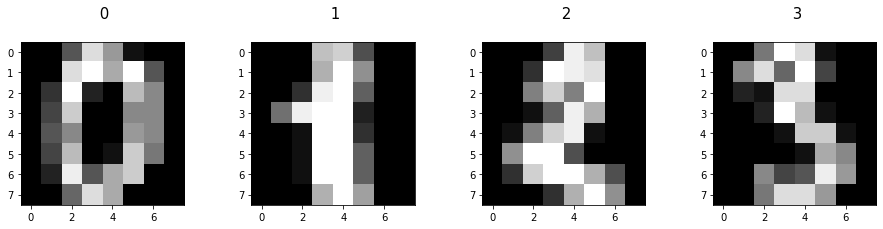

In [45]:

plt.figure(figsize=(20,3))
for index, (image, label) in enumerate(zip(digits.data[0:4], digits.target[0:4])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title(' %i\n' % label, fontsize = 15)

In [7]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression
# from lr_1 import logisticRegression
skf = StratifiedKFold(n_splits=4)
skf.get_n_splits(digits.data, digits.target)
print(skf)
model = LogisticRegression(max_iter=20000)

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)


In [32]:
for train_index, test_index in skf.split(digits.data, digits.target):
    X_train, X_test = digits.data[train_index], digits.data[test_index]
    y_train, y_test = digits.target[train_index], digits.target[test_index]
    # print(y_train.shape)
    model.fit(X_train, y_train)
    model.predict(X_test[0:10])
    Y_hat= model.predict(X_test)

In [33]:
cf_m = metrics.confusion_matrix(y_test, Y_hat)

In [43]:

import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
skfold = StratifiedKFold(n_splits=4, random_state=100)
results_skfold = model_selection.cross_val_score(model, digits.data, digits.target, cv=skfold)
print("Accuracy: %.3f%%"% (results_skfold.mean()*100.0))

Accuracy: 92.988%


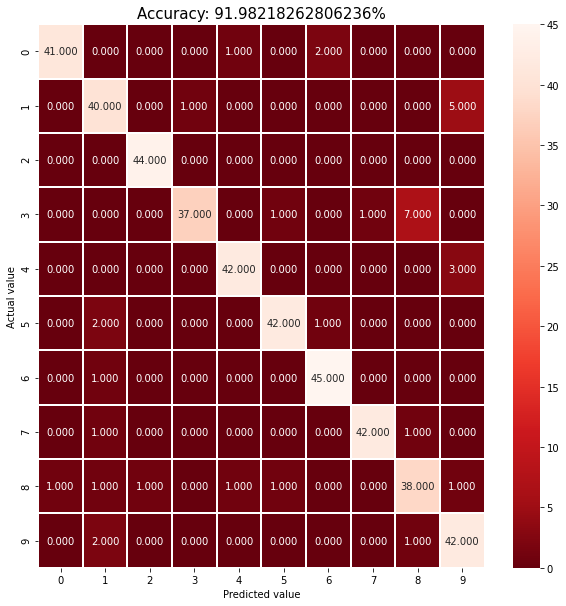

In [42]:
score = model.score(X_test, y_test)
plt.figure(figsize=(10,10))
sns.heatmap(cf_m, annot=True, fmt=".3f", linewidths=1, cmap = 'Reds_r');
plt.ylabel('Actual value');
plt.xlabel('Predicted value');
all_sample_title = 'Accuracy: {0}%'.format(score*100)
plt.title(all_sample_title, size = 15);



*   Most confused digit: 3 predicted as 8
*   Easiest digit to predict: 2

